In [4]:
import os

os.listdir('./data')

['공공보건의료기관현황.csv', '행정구역_시군구_별__성별_인구수.xlsx', '행정구역_시군구_별__성별_인구수2.xlsx']

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('data/공공보건의료기관현황.csv', index_col=0, encoding='CP949', engine='python')
data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [7]:
addr = pd.DataFrame(data['주소'].apply(lambda v : v.split()[:2]).tolist(), columns=('시도', '군구'))

addr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [8]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [9]:
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [10]:
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']

In [11]:
addr.iloc[31]

시도    경상남도
군구     창원시
Name: 31, dtype: object

In [12]:
addr[addr['시도'] == '경산시']

,시도,군구
47,경산시,경안로


In [13]:
addr.iloc[47] = ['경상북도', '경산시']
addr.iloc[47]

시도    경상북도
군구     경산시
Name: 47, dtype: object

In [14]:
addr[addr['시도'] == '천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [15]:
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']

In [16]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [17]:
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', '대전시':'대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}

In [18]:
# key - value값을 비교하여 잘못 저장된 값을 바꾼다.
addr['시도'] = addr['시도'].apply(lambda v:addr_aliases.get(v, v))

In [19]:
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [20]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [21]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [22]:
addr.iloc[75] = ['제주특별자치도', '제주시']
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [23]:
addr['시도군구'] = addr.apply(lambda r : r['시도'] + ' ' + r['군구'], axis=1)
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [24]:
addr['count'] = 0

In [25]:
add_group = pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index=False).count())

In [26]:
add_group.head(10)

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1
5,강원도,영월군,강원도 영월군,1
6,강원도,원주시,강원도 원주시,2
7,강원도,정선군,강원도 정선군,2
8,강원도,춘천시,강원도 춘천시,5
9,강원도,태백시,강원도 태백시,1


In [27]:
add_group = add_group.set_index('시도군구')
add_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


In [28]:
population = pd.read_excel('data/행정구역_시군구_별__성별_인구수2.xlsx')
population.head()

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51400521,25612361,25788160
1,서울특별시,소계,9418885,4560702,4858183
2,서울특별시,종로구,140601,67923,72678
3,서울특별시,중구,121346,58845,62501
4,서울특별시,용산구,217438,104495,112943


In [29]:
population = population.rename(columns={'행정구역(시군구)별(1)':'시도', '행정구역(시군구)별(2)':'군구'})
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51400521,25612361,25788160
1,서울특별시,소계,9418885,4560702,4858183
2,서울특별시,종로구,140601,67923,72678
3,서울특별시,중구,121346,58845,62501
4,서울특별시,용산구,217438,104495,112943


In [30]:
for element in range(0,len(population)):
    population['군구'][element] = population['군구'][element].strip()

C:\Users\soldesk\AppData\Local\Temp\ipykernel_8148\1909878512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['군구'][element] = population['군구'][element].strip()


In [31]:
population['시도군구'] = population.apply(lambda r:r['시도'] + ' ' + r['군구'], axis=1)
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51400521,25612361,25788160,전국 소계
1,서울특별시,소계,9418885,4560702,4858183,서울특별시 소계
2,서울특별시,종로구,140601,67923,72678,서울특별시 종로구
3,서울특별시,중구,121346,58845,62501,서울특별시 중구
4,서울특별시,용산구,217438,104495,112943,서울특별시 용산구


In [32]:
population = population[population.군구 != '소계']
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
2,서울특별시,종로구,140601,67923,72678,서울특별시 종로구
3,서울특별시,중구,121346,58845,62501,서울특별시 중구
4,서울특별시,용산구,217438,104495,112943,서울특별시 용산구
5,서울특별시,성동구,279760,135931,143829,서울특별시 성동구
6,서울특별시,광진구,336580,162020,174560,서울특별시 광진구


In [33]:
population = population.set_index('시도군구')
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,140601,67923,72678
서울특별시 중구,서울특별시,중구,121346,58845,62501
서울특별시 용산구,서울특별시,용산구,217438,104495,112943
서울특별시 성동구,서울특별시,성동구,279760,135931,143829
서울특별시 광진구,서울특별시,광진구,336580,162020,174560


In [34]:
# left_index=True, right_index=True 옵션을 넣으면 
# 왼쪽 데이터프레임의 인덱스와 오른쪽 데이터프레임의 인덱스가 같은 행만 추출한다.
addr_population_merge = pd.merge(add_group, population, how='inner', left_index=True, right_index=True)
addr_population_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,210558,104361,106197
강원도 동해시,강원도,동해시,1,강원도,동해시,89144,45302,43842
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,63359,32145,31214
강원도 속초시,강원도,속초시,1,강원도,속초시,82521,40876,41645
강원도 양구군,강원도,양구군,1,강원도,양구군,21342,11212,10130


In [35]:
local_MC_population = addr_population_merge[['시도_x', '군구_x', 'count', '총인구수 (명)']]
local_MC_population = local_MC_population.rename(columns={'시도_x':'시도', '군구_x':'군구', '총인구수 (명)':'인구수'})
local_MC_population.head()

,시도,군구,count,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,210558
강원도 동해시,강원도,동해시,1,89144
강원도 삼척시,강원도,삼척시,1,63359
강원도 속초시,강원도,속초시,1,82521
강원도 양구군,강원도,양구군,1,21342


- 데이터 시각화

In [36]:
MC_count = local_MC_population['count']
local_MC_population['MC_ratio'] = MC_count.div(local_MC_population['인구수'], axis=0) * 100000
local_MC_population

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,210558,1.899714
강원도 동해시,강원도,동해시,1,89144,1.121780
강원도 삼척시,강원도,삼척시,1,63359,1.578308
강원도 속초시,강원도,속초시,1,82521,1.211813
강원도 양구군,강원도,양구군,1,21342,4.685596
...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27685,3.612064
충청북도 영동군,충청북도,영동군,1,44657,2.239291
충청북도 제천시,충청북도,제천시,1,131415,0.760948


In [37]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

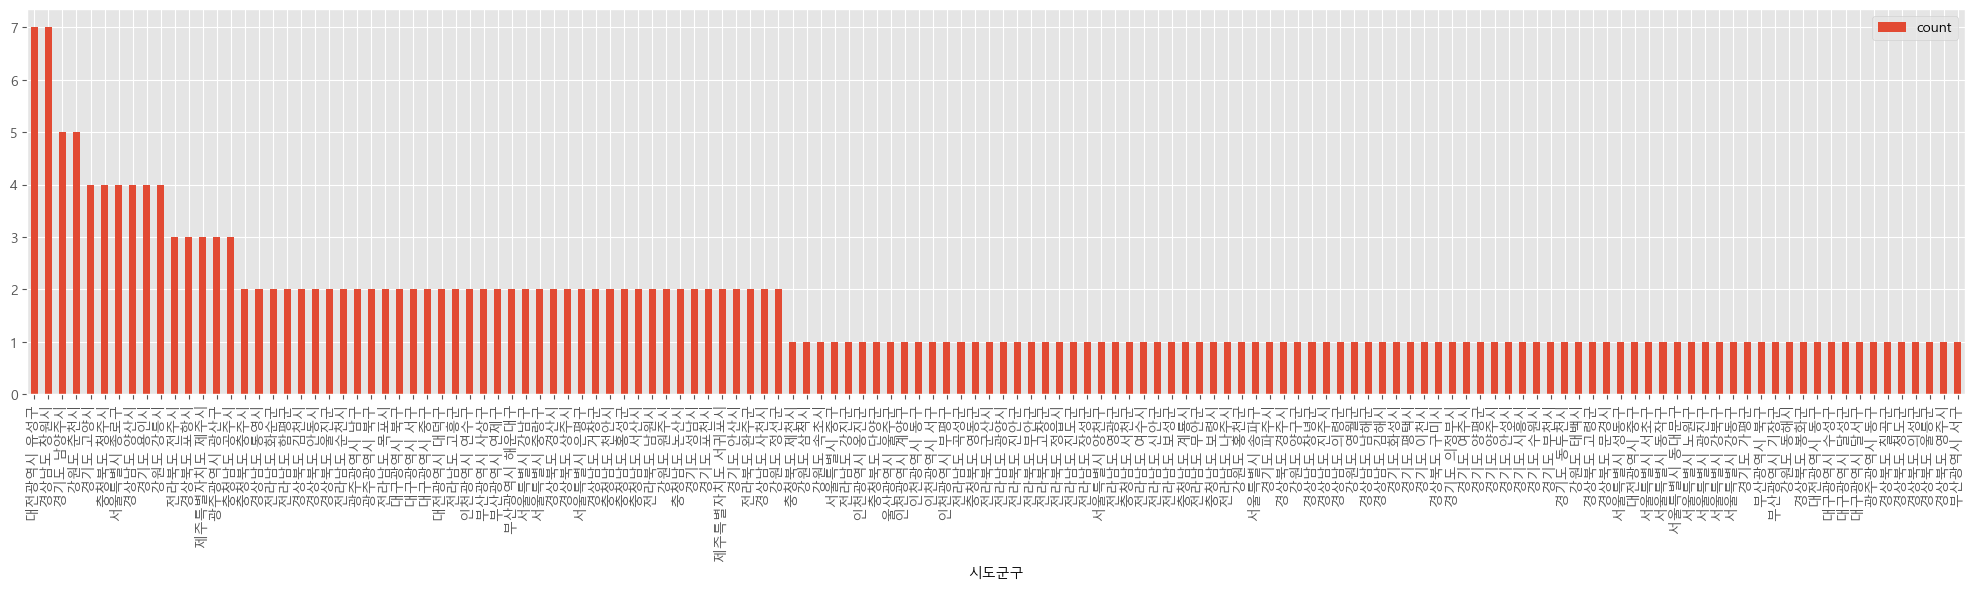

In [39]:
MC_count = local_MC_population[['count']]
MC_count = MC_count.sort_values('count', ascending=False)
plt.rcParams["figure.figsize"]=(25, 5)
MC_count.plot(kind='bar', rot=90)
plt.show()

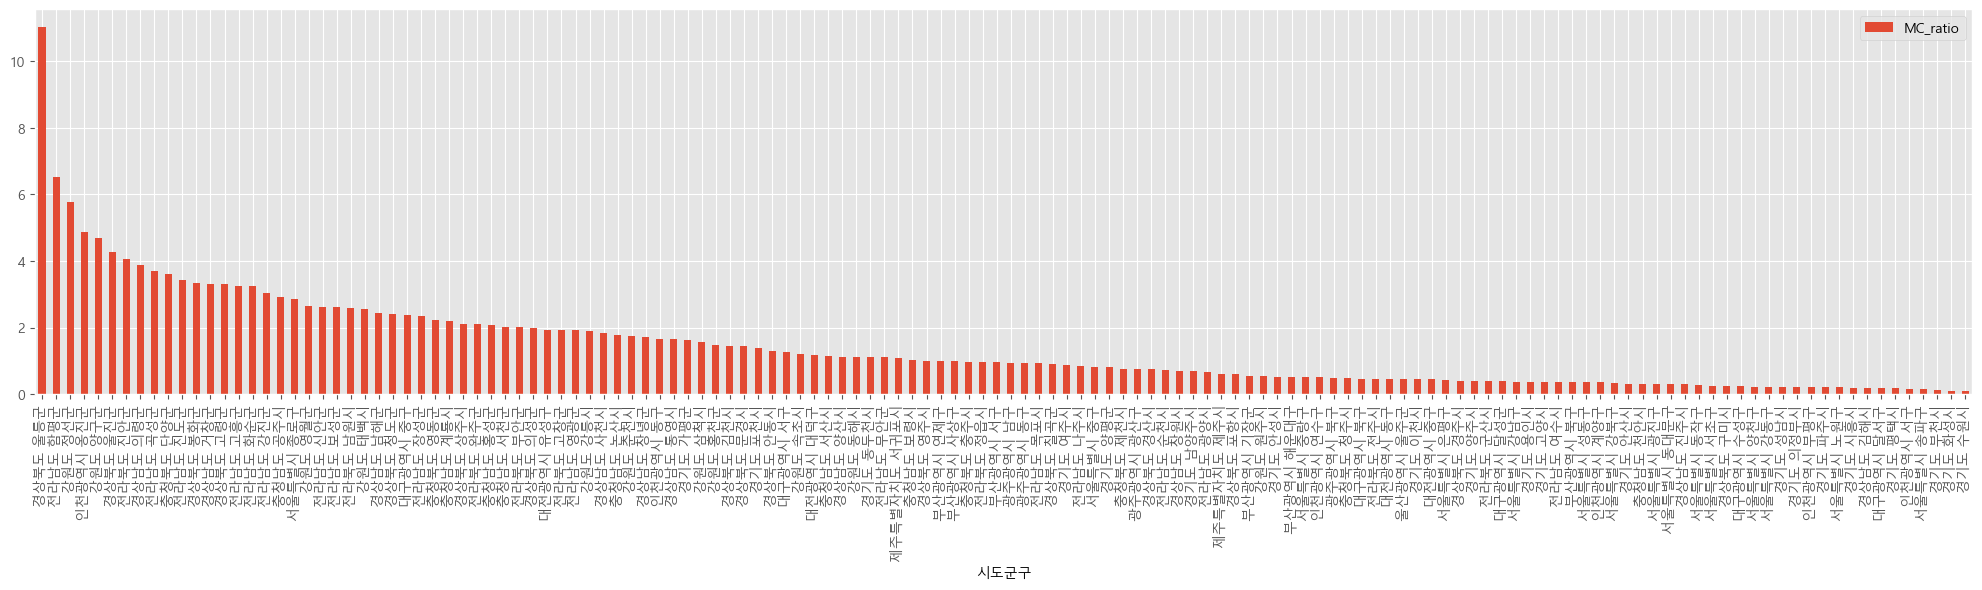

In [41]:
MC_ratio = local_MC_population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False)
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind='bar', rot=90)
plt.show()

In [42]:
data_draw_korea = pd.read_csv('data/data_draw_korea.csv', index_col=0, encoding='UTF-8', engine='python')
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [45]:
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r:r['광역시도'] + ' ' + r['행정구역'], axis=1)
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구
0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시
...,...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시,충청북도 제천시
225,34480,증평,6,11,81.84,충청북도,증평군,충청북도 증평군
226,62809,진천,5,11,406.08,충청북도,진천군,충청북도 진천군
227,790216,청주,6,12,932.51,충청북도,청주시,충청북도 청주시


In [46]:
data_draw_korea = data_draw_korea.set_index('시도군구')
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [47]:
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea, local_MC_population, how='outer', left_index=True, right_index=True)
data_draw_korea_MC_Population_all.head()

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,강원도,강릉시,4.0,210558.0,1.899714
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,강원도,동해시,1.0,89144.0,1.121780
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,강원도,삼척시,1.0,63359.0,1.578308
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,강원도,속초시,1.0,82521.0,1.211813


In [48]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [49]:
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    
    plt.savefig('.\\data\\' + 'blockMap_' + targetData + '.png')
                      
    
    plt.show() 

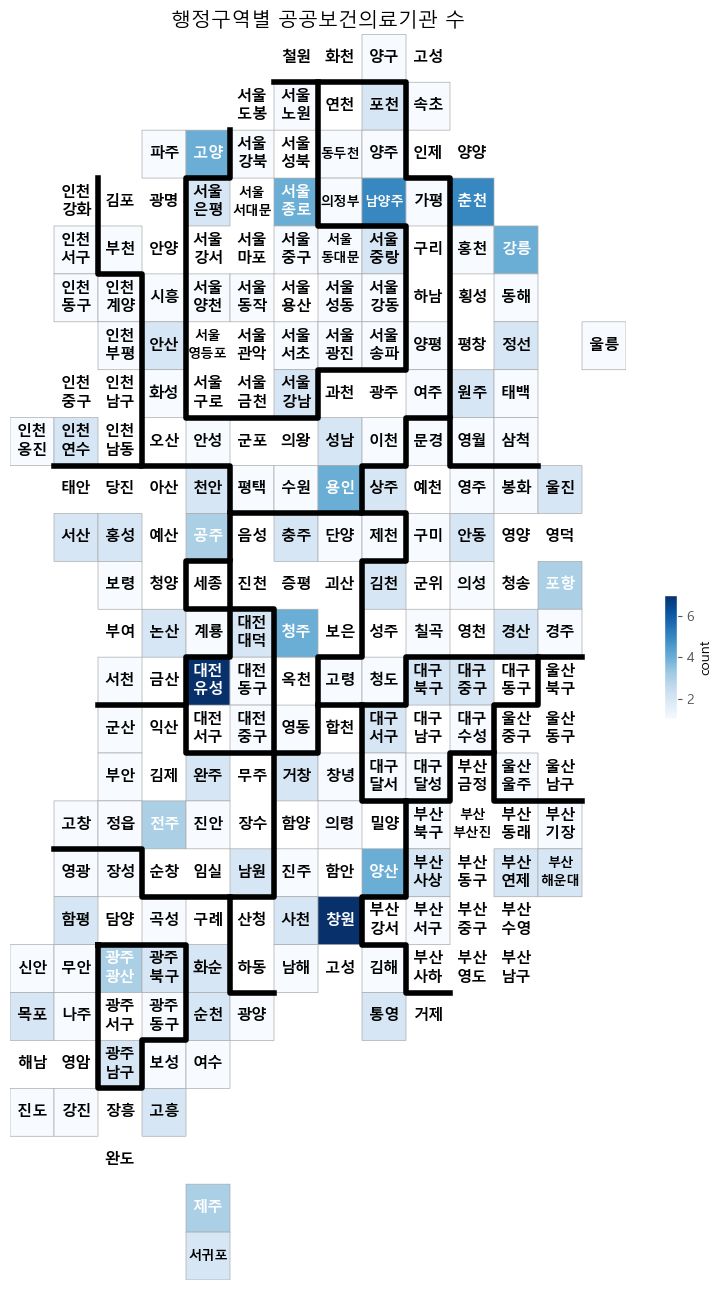

In [50]:
draw_blockMap(data_draw_korea_MC_Population_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

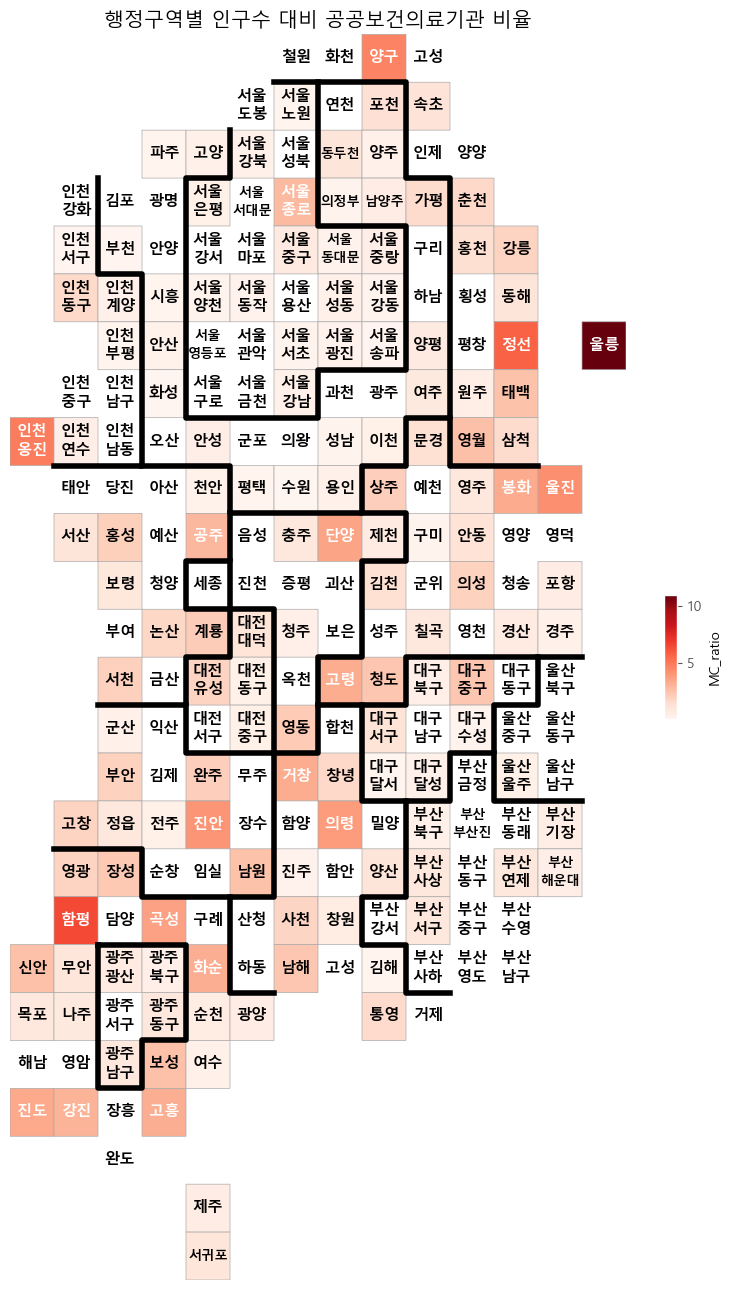

In [51]:
draw_blockMap(data_draw_korea_MC_Population_all, 'MC_ratio', '행정구역별 인구수 대비 공공보건의료기관 비율', 'Reds')

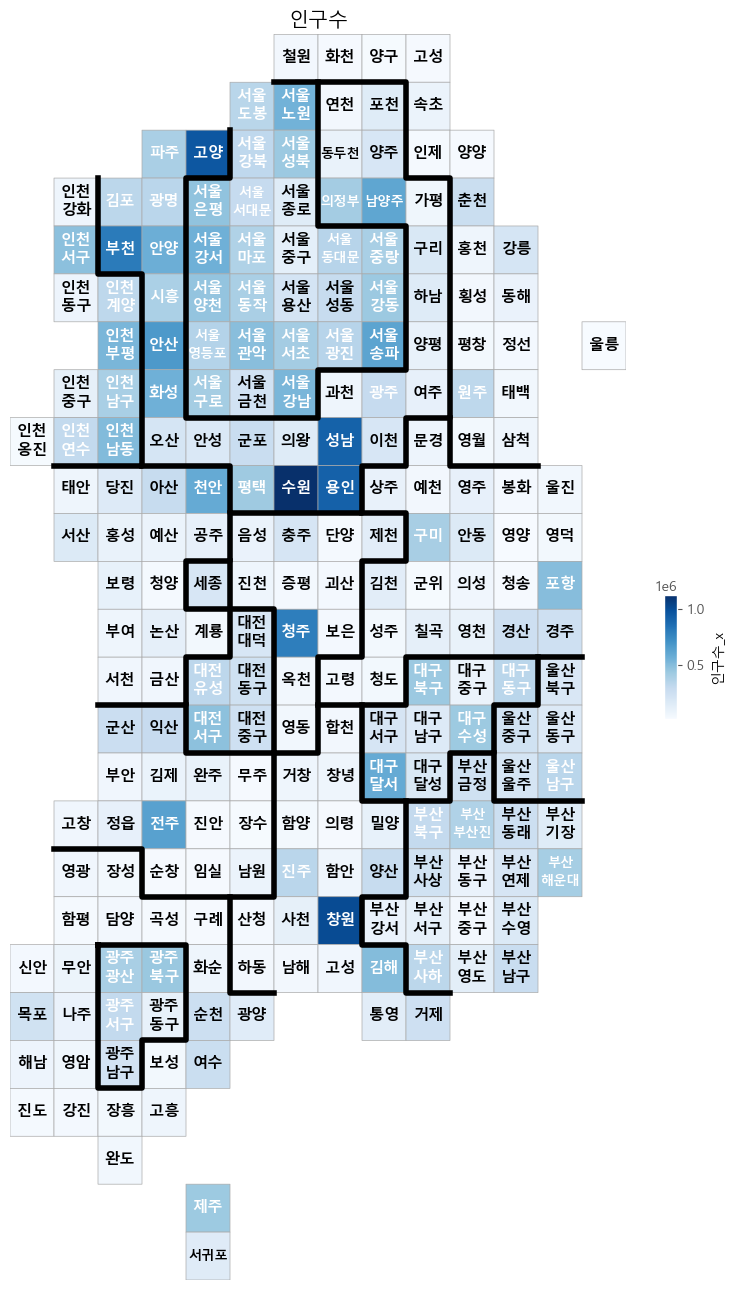

In [52]:
draw_blockMap(data_draw_korea_MC_Population_all, '인구수_x', '인구수', 'Blues')